# Plans d'action

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

## Choix des stop word
Liste de stopwords (mots vides), soit des mots non significatifs figurant dans un texte.
La signification d'un mot s'évalue à partir de sa distribution (au sens statistique) 
dans une collection de textes. Un mot est dit « vide » si sa distribution est uniforme sur les
textes de la collection. En d'autres termes, un mot qui apparaît avec une fréquence semblable 
dans chacun des textes de la collection n'est pas discriminant car il ne permet pas de distinguer
les textes les uns par rapport aux autres. 

Source: https://github.com/stopwords-iso/stopwords-fr

In [3]:
french_stopwords=["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]
english_stopwords=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

## Données

Fichier d'export des plans d'action (Source : SCOPE)

In [8]:
path = r"C:/Users/MSAKNIY/Desktop/BDDT/clustering/dummies_plans_d'actions.xlsx"

## Traitement des données

In [9]:
plans=pd.read_excel(path)
plans["Description du plan d'action"] = plans["Description du plan d'action"].fillna("")
plans["Date de début"] = pd.to_datetime(plans['Date de début'], format='%d-%m-%Y')
# Effacement des "/" dans les noms des départements/services pour la création de nom de fichier
plans["Entité"] = plans["Entité"].str.replace("/","")

## Définition de fonctions

Définition d'une fonction permettant d'appliquer la clusterisation (Analyse en Componsante Principale - PCA) à l'ensemble des départements/services (entity)

In [10]:
#### CHOISIR LE PERIMETRE et CHOISIR LA DATE DE DEPART

def InfoPerEntity(plans, french_stopwords, entity, metric='silhouette'):
    plans_=plans[plans["Entité"].str.contains(entity) & (plans["Date de début"] > '01-01-2017')]
    
    #1/ Feature extraction
    #Definition de la fonction de vectorisation en retirant au préalable tout les "stopwords" (mots vides de sens)
    vec = TfidfVectorizer(stop_words=french_stopwords)
    #Application de la fonction de vectorisation aux plans d'actions
    features=vec.fit_transform(plans_["Description du plan d'action"].values)
    vec = TfidfVectorizer(stop_words=french_stopwords)


    # Silhouette Score for K means
    # Import ElbowVisualizer

    #TODO Add MiniBatchKMeans
    model = MiniBatchKMeans()
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, metric=metric, k=(2,10), timings= True)
    visualizer.fit(features)        # Fit the data to the visualizer
    visualizer.show() 
    k = visualizer.elbow_value_
    return plans_, features, k

# CLUSTERISATION

## Clusterisation par département/service séparément

Application de la fonction à chaque département/service (entity) séparément. Il est nécessaire de définir si l'on souhaite le réaliser sur tous les départements/services (*entity = plans["Entité"].unique()*) ou à une sélection de départements/service (entity = ["Département 1","Département 2","XXXX",]).
<br> C'est à dire : on réalise une clusterisation par département, une première uniquement sur les plans d'action du département 1 puis une seconde uniquement sur les plans d'action du département 2. Cela permet de faire une analyse par département.

Département 1 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Département 2 n_samples=6 should be >= n_clusters=7.


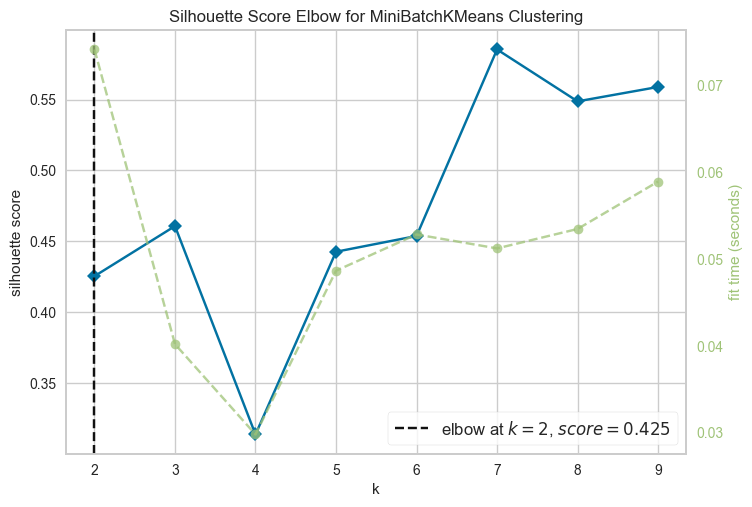

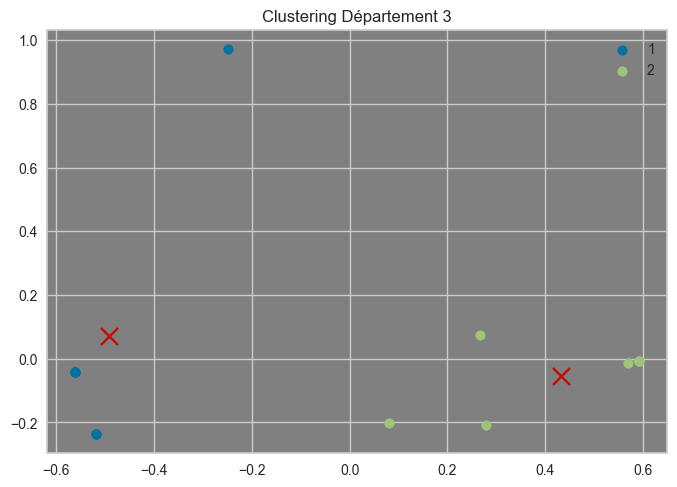

Département 3 [Errno 2] No such file or directory: './clustering/Par_Service/Representation des clusters Département 3.jpg'
Département 4 n_samples=4 should be >= n_clusters=5.


<Figure size 800x550 with 0 Axes>

In [11]:
for entity in plans["Entité"].unique() : #["Département 1","Département 2","XXXX",] :
    
    try:
        plans_, features, k = InfoPerEntity(plans,french_stopwords=french_stopwords, entity= entity)
        BEST_NUMBER_OF_CLUSTERS=k
        BEST_NUMBER_OF_CLUSTERS

        #Construction du meilleur clustering
        clustering_result = MiniBatchKMeans(n_clusters=BEST_NUMBER_OF_CLUSTERS, random_state=1)
        clustering_result.fit(features)

        #Application d'une Analyse en Composantes Principales (PCA) avant la représentation graphique
        pca = PCA(n_components=min(k,4), random_state=1)
        reduced_features = pca.fit_transform(features.toarray())

        #Projection des centres du cluster dans le repere des vecteurs propres
        reduced_cluster_centers = pca.transform(clustering_result.cluster_centers_)
        plt.rcParams['axes.facecolor'] = 'Gray'
        
        #Plotting
        fig, ax = plt.subplots()
        scatter_x = reduced_features[:,0]
        scatter_y = reduced_features[:,1]
        group = clustering_result.predict(features) + 1
        for g in np.unique(group):
            i = np.where(group == g)
            ax.scatter(scatter_x[i], scatter_y[i], label=g)

        plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')
        plt.title("Clustering %s" %entity)
        ax.legend()
        
        # Sauvegarder le graphique 
        fig = plt.gcf()
        plt.show()
        plt.draw()        
        fig.savefig('./clustering/Par_Service/Representation des clusters %s.jpg' %entity)

        plans_["X_coord"]=reduced_features[:,0]
        plans_["Y_coord"]=reduced_features[:,1]
        plans_["cluster"]=clustering_result.labels_ +1
        plans_["inertia"]=clustering_result.inertia_
        plans_.to_excel("./clustering/Par_Service/Resultat Clustering %s.xlsx" %entity,index=False)
    except Exception as e:
        print(entity, str(e))

## Clusterisation simultanée des département/service (*entity*)

Application de la fonction à l'ensemble des départements/services (entity) présents dans le fichier en même temps (*plans["Entité"].unique()*) soit à une sélection définie à la main (liste).
<br> C'est à dire : on compare les plans d'action du département 1 et ceux du département 2 sans distinction

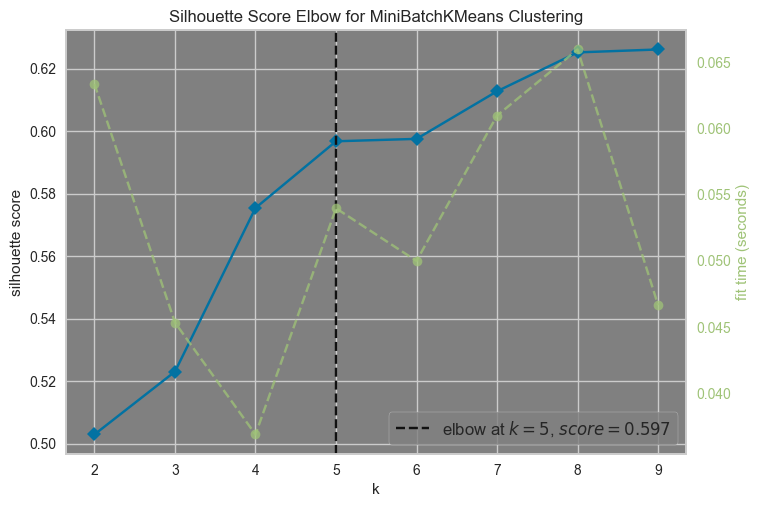

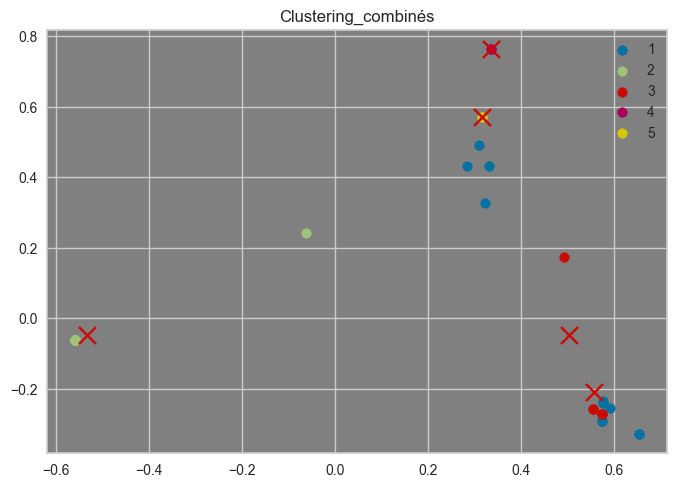

<Figure size 800x550 with 0 Axes>

In [12]:
### CHOIX DU PERIMETRE
entity = plans["Entité"].unique()
#entity = ["Département 1","Département 2","XXXX",]

###CHOIX DE LA DATE DE DEPART
plans_=plans[plans["Entité"].isin(entity) & (plans["Date de début"] > '01-01-2017')]
plans_ = plans_.reset_index()

####### TEST #########

vec = TfidfVectorizer(stop_words=french_stopwords)
features=vec.fit_transform(plans_["Description du plan d'action"].values)

model = MiniBatchKMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, metric='silhouette', k=(2,10), timings= True)
visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show() 
k = visualizer.elbow_value_
BEST_NUMBER_OF_CLUSTERS=k


#Construction du meilleur clustering
clustering_result = MiniBatchKMeans(n_clusters=BEST_NUMBER_OF_CLUSTERS, random_state=1)
clustering_result.fit(features)

#Application d'une Analyse en Composantes Principales (PCA) avant la représentation graphique
pca = PCA(n_components=min(k,6), random_state=1)
reduced_features = pca.fit_transform(features.toarray())

#Projection des centres du cluster dans le repere des vecteurs propres
reduced_cluster_centers = pca.transform(clustering_result.cluster_centers_)
plt.rcParams['axes.facecolor'] = 'Gray'

#Plotting
fig, ax = plt.subplots()
scatter_x = reduced_features[:,0]
scatter_y = reduced_features[:,1]
group = clustering_result.predict(features) +1
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)

plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')
plt.title("Clustering_combinés")
ax.legend()
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig(r'C:/Users/MSAKNIY/Desktop/BDDT/clustering/Resultat_Clustering_combiné.jpg')

# Sauvegarder le graphique 

plans_["X_coord"]=reduced_features[:,0]
plans_["Y_coord"]=reduced_features[:,1]
plans_["cluster"]=clustering_result.labels_ +1
plans_["inertia"]=clustering_result.inertia_
plans_.to_excel(r"C:/Users/MSAKNIY/Desktop/BDDT/clustering/Resultat_Clustering_combiné.xlsx",index=False)

## Visualisation des plans d'action par département/services (entity)

Visualisation des plans d'action mais sans détermination de cluster. Ici, les groupes représentés par les couleurs correspondent aux différents départements/services.

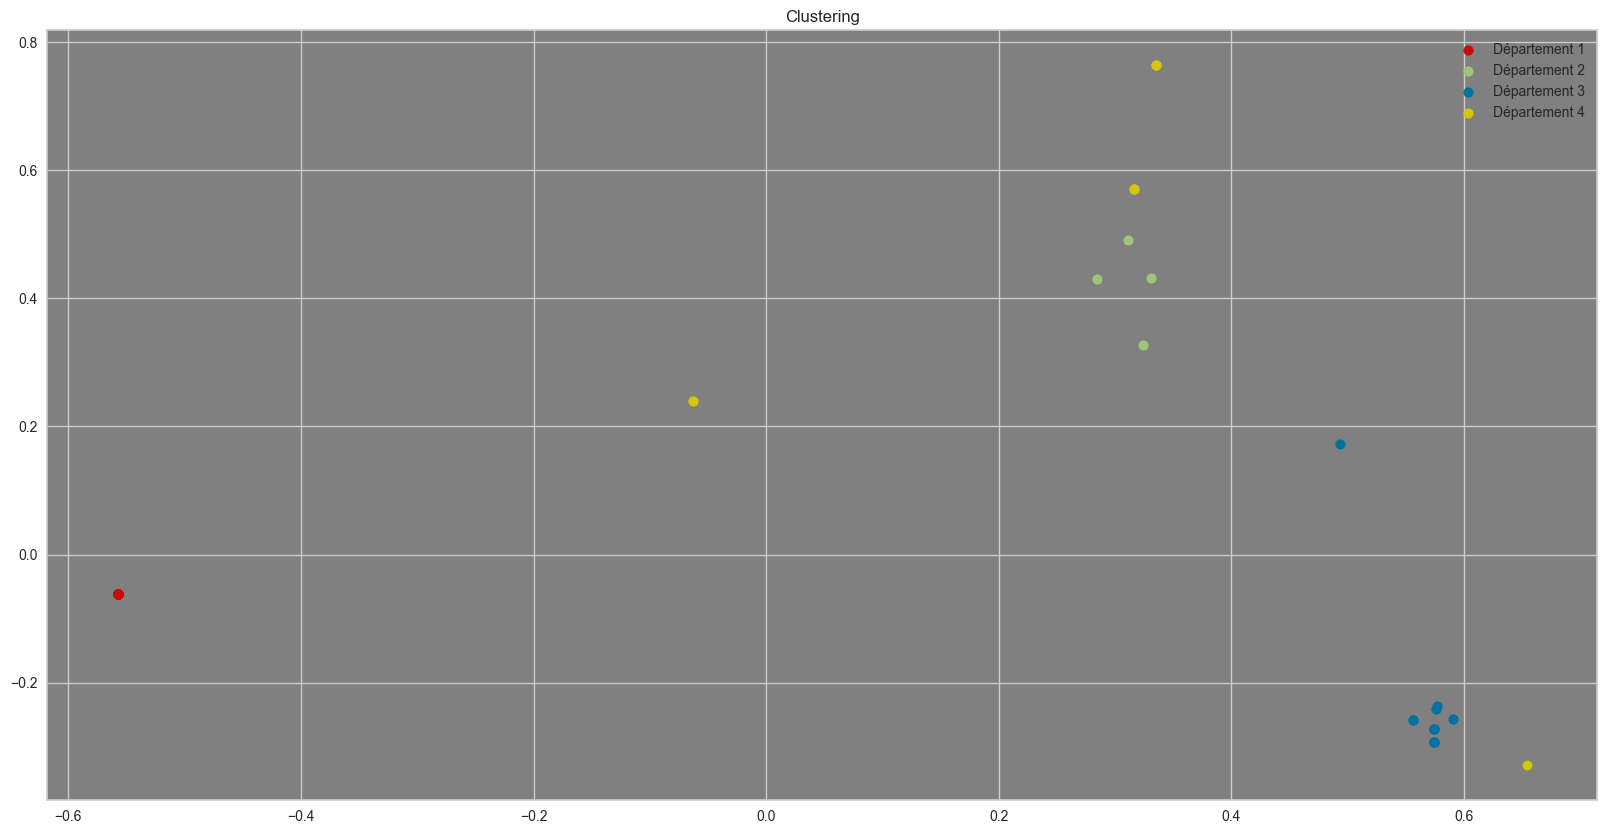

<Figure size 800x550 with 0 Axes>

In [13]:
### CHOIX DU PERIMETRE
entity = plans["Entité"].unique()
#entity = ["Département 1","Département 2","XXXX",]

###CHOIX DE LA DATE DE DEPART
plans_=plans[plans["Entité"].isin(entity) & (plans["Date de début"] > '01-01-2017')]
plans_ = plans_.reset_index()

####### TEST #########

vec = TfidfVectorizer(stop_words=french_stopwords)
features=vec.fit_transform(plans_["Description du plan d'action"].values)

#Application d'une Analyse en Composantes Principales (PCA) avant la représentation graphique
pca = PCA(n_components=len(entity))

reduced_features = pca.fit_transform(features.toarray())
plt.rcParams['axes.facecolor'] = 'Gray'

ACP0 = reduced_features[:,0]
ACP1 = reduced_features[:,1]

#Plotting
plt.figure(figsize=(20, 10))
for c, i, act in zip("rgbycm", range(0,len(entity)+1),entity):
    temp = plans_.loc[plans_["Entité"]==act].index
    plt.scatter(ACP0[temp],ACP1[temp],color=c,label=entity[i])

plt.title("Clustering")
plt.legend()
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig(r'C:\Users\MSAKNIY\Desktop\BDDT\clustering/Resultat_Clustering_All_Clu.jpg')

plans_["X_coord"]=reduced_features[:,0]
plans_["Y_coord"]=reduced_features[:,1]
plans_.to_excel(r"C:\Users\MSAKNIY\Desktop\BDDT\clustering/Resultat_Clustering_All_Clu.xlsx",index=False)
